In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
files= files.upload()


Saving Retail and wherehouse Sale.csv to Retail and wherehouse Sale (5).csv


In [3]:
df=pd.read_csv('Retail and wherehouse Sale.csv')

In [4]:
df.isnull().sum()


,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [5]:
df.shape

(30000, 9)

In [6]:
df['SUPPLIER']=df['SUPPLIER'].fillna('Unknown')

In [7]:
df['RETAIL SALES']=df['RETAIL SALES'].fillna(0)

In [8]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [9]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,30000.0,30000.000000,30000.000000,30000.000000,30000.000000
mean,2020.0,3.911467,6.939565,6.594058,27.431031
std,0.0,2.836788,33.080527,27.879428,272.166085
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000


In [10]:
df.describe(include='object')

,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE
count,30000,30000,30000,30000
unique,291,15668,15732,8
top,"THE COUNTRY VINTNER, LLC DBA WINEBOW",16225,TENTH WARD DIST CO CARAWAY RYE - 750ML,WINE
freq,2041,4,5,18680


In [11]:
df.fillna(0).isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [12]:
df.rename(columns={'YEAR':'Year','MONTH':'Month','SUPPLIER':'Supplier','ITEM CODE': 'ItemCode','ITEM TYPE':'ItemType','ITEM DESCRIPTION': 'ItemDescription','ITEM_TYPE':'ItemType','RETAIL SALES':'RetailSales','RETAIL TRANSFERS':'RetailTransfers','WAREHOUSE SALES':'WarehouseSales'},inplace=True)
df.head(2)

,Year,Month,Supplier,ItemCode,ItemDescription,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


In [13]:
Suppliers = df['Supplier'].value_counts()
Suppliers

,count
Supplier,
"THE COUNTRY VINTNER, LLC DBA WINEBOW",2041
REPUBLIC NATIONAL DISTRIBUTING CO,1832
SOUTHERN GLAZERS WINE AND SPIRITS,1304
LEGENDS LTD,1227
MONSIEUR TOUTON SELECTION,1131
...,...
SNR HOLDINGS LLC,1
RSL HOLDINGS INC,1
VINIFERA DISTRIBUTING OF MARYLAND INC,1


In [14]:
TopSuppliers=Suppliers.nlargest(5)
TopSuppliers

,count
Supplier,
"THE COUNTRY VINTNER, LLC DBA WINEBOW",2041
REPUBLIC NATIONAL DISTRIBUTING CO,1832
SOUTHERN GLAZERS WINE AND SPIRITS,1304
LEGENDS LTD,1227
MONSIEUR TOUTON SELECTION,1131


In [15]:
from collections import Counter

counter = Counter(df['Supplier'])

Bottom_Suppliers ="\n".join(
    f"{name} - {cnt}"
    for name, cnt in counter.items()
    if cnt == 1)

print(Bottom_Suppliers)

THE SANDY BOTTOM ENTERPRISES LLC - 1
SCOPERTA IMPORTING COMPANY INC - 1
SANGLIER SELECTIONS LLC - 1
Z WINE GALLERY IMPORTS LLC - 1
LOOK VODKA LLC - 1
BREWDOG BREWING COMPANY LLC - 1
SNR HOLDINGS LLC - 1
RSL HOLDINGS INC - 1
GJS SALES INC - 1
VINIFERA DISTRIBUTING OF MARYLAND INC - 1
MARQUEE SELECTIONS LLC - 1
SMITH-ANDERSON ENTERPRISES INC - 1


/tmp/ipython-input-1852532262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Supplier'], order=smallest_15_suppliers.index, palette='autumn_r')


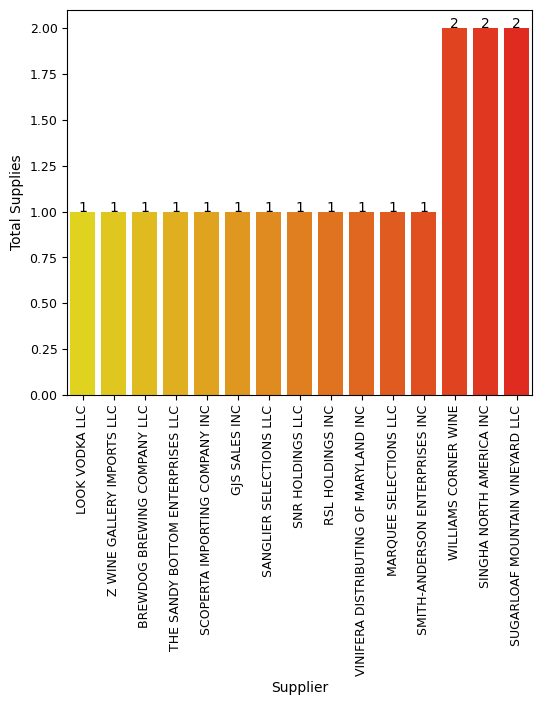

In [16]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')
plt.figure(figsize=(6,5))
smallest_15_suppliers = df['Supplier'].value_counts().nsmallest(15)
sns.countplot(x=df['Supplier'], order=smallest_15_suppliers.index, palette='autumn_r')
plt.xlabel('Supplier')
plt.ylabel('Total Supplies')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
# Call add_labels with the index (for iteration count) and values (for labels) of the smallest_15_suppliers series
add_labels(smallest_15_suppliers.index, smallest_15_suppliers.values)
plt.show()

/tmp/ipython-input-691433010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suppliers.index, y=top_suppliers.values, palette='GnBu_r')


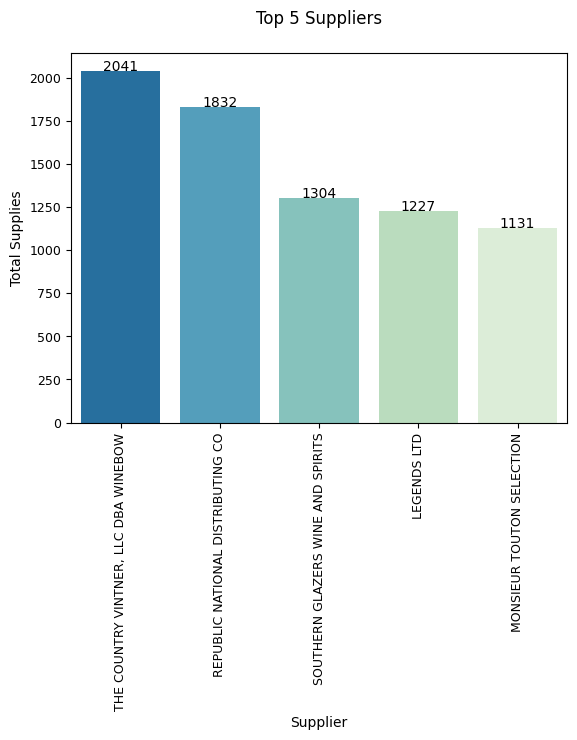

In [17]:
top_suppliers=df['Supplier'].value_counts().nlargest(5)
sns.barplot(x=top_suppliers.index, y=top_suppliers.values, palette='GnBu_r')
plt.title('Top 5 Suppliers\n')
plt.xlabel('Supplier')
plt.ylabel('Total Supplies')
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
# Call add_labels with the index (for iteration count) and values (for labels) of the smallest_15_suppliers series
add_labels(top_suppliers.index, top_suppliers.values)
plt.show()

In [18]:
unique_types=df['ItemType'].unique()
unique_types

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

<Figure size 600x500 with 0 Axes>

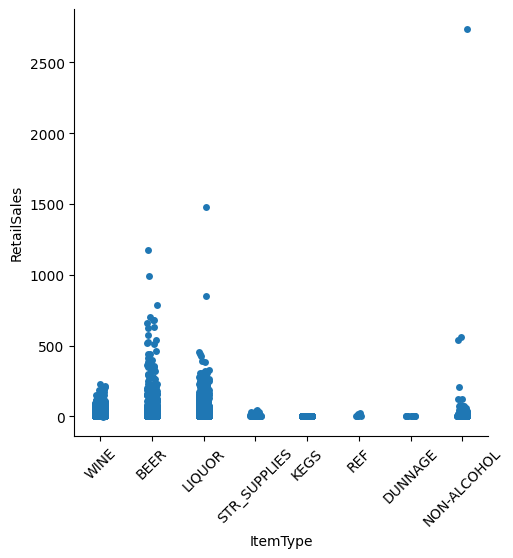

In [19]:
plt.figure(figsize=(6,5))
sns.catplot(data=df, x='ItemType',y='RetailSales')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x500 with 0 Axes>

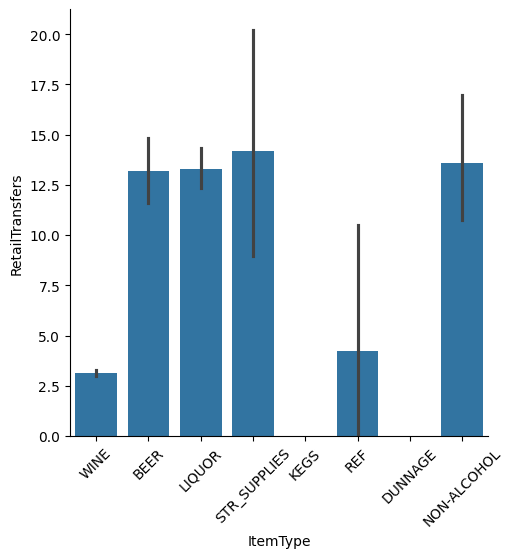

In [21]:
plt.figure(figsize=(6,5))
sns.catplot(data=df, x='ItemType',y='RetailTransfers', kind='bar')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x500 with 0 Axes>

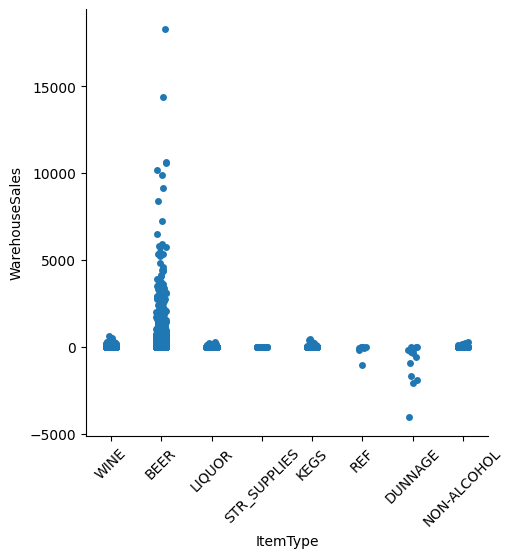

In [22]:
plt.figure(figsize=(6,5))
sns.catplot(data=df, x='ItemType',y='WarehouseSales')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.show

Text(0.5, 1.0, 'Top 5 Items\n')

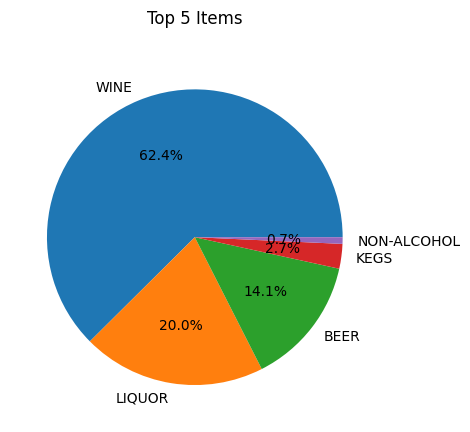

In [23]:
plt.pie(df['ItemType'].value_counts().nlargest(5), labels=df['ItemType'].value_counts().nlargest(5).index, autopct='%1.1f%%')
plt.title('Top 5 Items\n')
